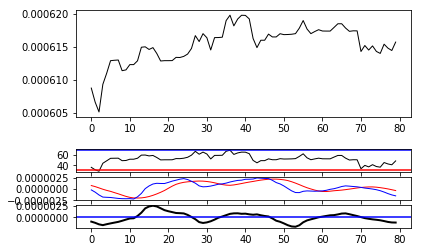

In [1]:
# Reference: https://kknews.cc/invest/pl2xyn8.html
import tushare as ts
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_finance as mpf 
import talib as tl

# 設 置起始日期
start_date ='2018-04-01' 
End_date = '2019-07-01'
# 導入數據 
df_300427 = ts.get_hist_data('300427',start=start_date,end=End_date) 
df_300427 = df_300427.sort_index() # Sort in ascend order of date

# 計算均線" 
sma_10 = tl.SMA(np.array(df_300427['close']), 10) 
# Calculate MACD

import numpy as np
import matplotlib.pyplot as plt



######   data


prices = np.array([ 0.00061422,  0.00061422,  0.00061593,  0.00061672,  0.0006161 ,
		0.00061233,  0.000615  ,  0.00061305,  0.00061346,  0.00061417,
		0.00061428,  0.00061418,  0.0006115 ,  0.00061203,  0.0006125 ,
		0.00061295,  0.00061296,  0.00061295,  0.00061242,  0.00061144,
		0.00060874,  0.00060661,  0.00060512,  0.00060931,  0.000611  ,
		0.0006129 ,  0.00061296,  0.000613  ,  0.00061138,  0.0006115 ,
		0.0006123 ,  0.0006123 ,  0.00061288,  0.00061494,  0.000615  ,
		0.0006146 ,  0.00061488,  0.00061399,  0.00061285,  0.0006129 ,
		0.0006129 ,  0.00061291,  0.0006134 ,  0.00061338,  0.00061355,
		0.0006139 ,  0.00061475,  0.0006167 ,  0.0006158 ,  0.000617  ,
		0.00061638,  0.00061452,  0.0006164 ,  0.00061641,  0.00061646,
		0.00061898,  0.0006198 ,  0.00061818,  0.00061922,  0.00061979,
		0.00061977,  0.00061924,  0.00061626,  0.00061488,  0.000616  ,
		0.000616  ,  0.00061693,  0.0006165 ,  0.0006165 ,  0.00061699,
		0.00061685,  0.00061687,  0.00061691,  0.000617  ,  0.00061784,
		0.00061899,  0.0006177 ,  0.000617  ,  0.00061732,  0.0006176 ,
		0.0006174 ,  0.00061739,  0.00061739,  0.00061794,  0.0006185 ,
		0.0006185 ,  0.00061785,  0.00061735,  0.00061743,  0.00061742,
		0.00061429,  0.0006152 ,  0.00061451,  0.00061514,  0.0006143 ,
		0.000614  ,  0.0006154 ,  0.0006148 ,  0.00061444,  0.00061572])


######   functions


def moving_average(x, n, type='simple'):
	"""
	compute an n period moving average.

	type is 'simple' | 'exponential'

	"""
	x = np.asarray(x)
	if type == 'simple':
		weights = np.ones(n)
	else:
		weights = np.exp(np.linspace(-1., 0., n))

	weights /= weights.sum()

	a = np.convolve(x, weights, mode='full')[:len(x)]
	a[:n] = a[n]
	return a


def relative_strength(prices, n=14):
	"""
	compute the n period relative strength indicator
	http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
	http://www.investopedia.com/terms/r/rsi.asp
	"""

	deltas = np.diff(prices)
	seed = deltas[:n+1]
	up = seed[seed >= 0].sum()/n
	down = -seed[seed < 0].sum()/n
	rs = up/down
	rsi = np.zeros_like(prices)
	rsi[:n] = 100. - 100./(1. + rs)

	for i in range(n, len(prices)):
		delta = deltas[i - 1]  # cause the diff is 1 shorter

		if delta > 0:
			upval = delta
			downval = 0.
		else:
			upval = 0.
			downval = -delta

		up = (up*(n - 1) + upval)/n
		down = (down*(n - 1) + downval)/n

		rs = up/down
		rsi[i] = 100. - 100./(1. + rs)

	return rsi


def moving_average_convergence(x, nslow=26, nfast=12):
	"""
	compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
	return value is emaslow, emafast, macd which are len(x) arrays
	"""
	emaslow = moving_average(x, nslow, type='exponential')
	emafast = moving_average(x, nfast, type='exponential')
	return emaslow, emafast, emafast - emaslow


######   code


nslow = 26
nfast = 12
nema = 9
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
ema9 = moving_average(macd, nema, type='exponential')
rsi = relative_strength(prices)

wins = 80


plt.figure(1)

### prices

plt.subplot2grid((8, 1), (0, 0), rowspan = 4)
plt.plot(prices[-wins:], 'k', lw = 1)


### rsi

plt.subplot2grid((8, 1), (5, 0))
plt.plot(rsi[-wins:], color='black', lw=1)
plt.axhline(y=30,     color='red',   linestyle='-')
plt.axhline(y=70,     color='blue',  linestyle='-')


## MACD

plt.subplot2grid((8, 1), (6, 0))

plt.plot(ema9[-wins:], 'red', lw=1)
plt.plot(macd[-wins:], 'blue', lw=1)


plt.subplot2grid((8, 1), (7, 0))

plt.plot(macd[-wins:]-ema9[-wins:], 'k', lw = 2)
plt.axhline(y=0, color='b', linestyle='-')

plt.show()

234    2019-12-18
235    2019-12-19
236    2019-12-20
237    2019-12-23
238    2019-12-24
239    2019-12-25
240    2019-12-26
241    2019-12-27
242    2019-12-30
243    2019-12-31
Name: date, dtype: object


KeyError: 0

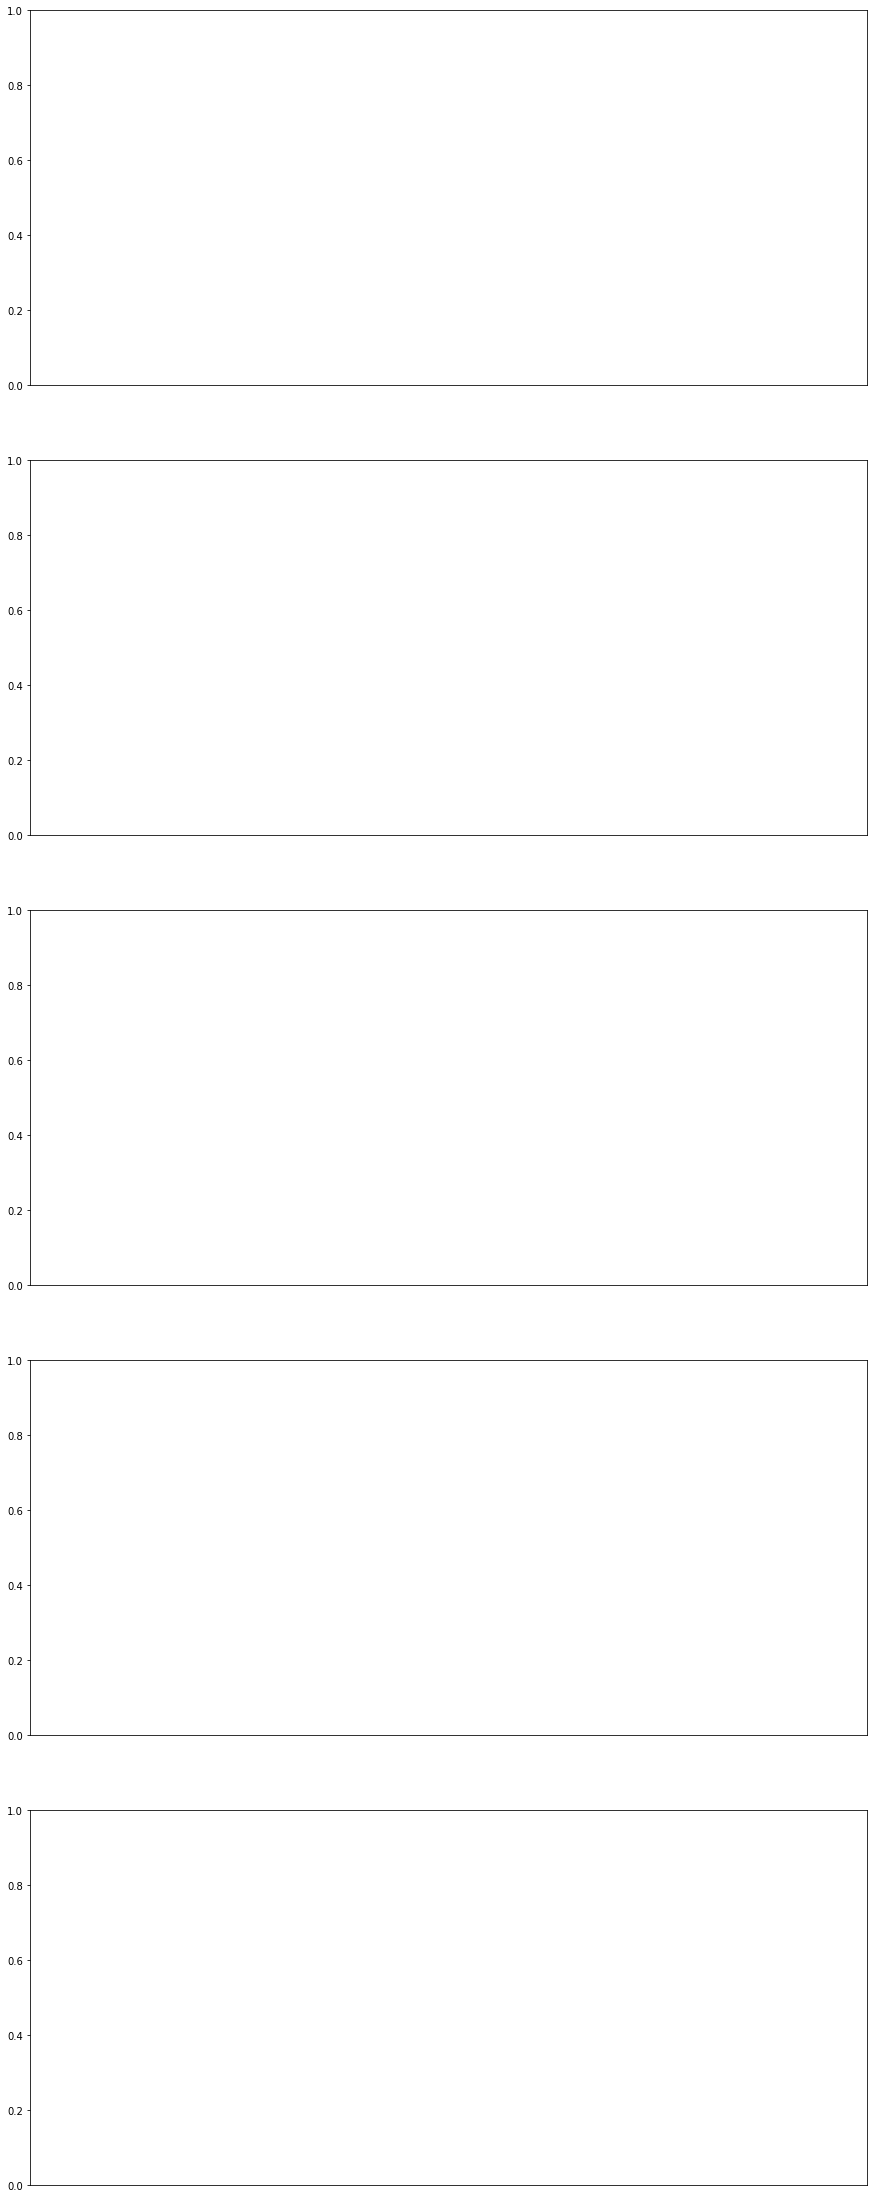

In [28]:
# -*- coding: utf-8 -*-
# Reference:
# Technical analysis Indicators without Talib (code): https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
# 指標說明: https://www.ejfq.com/hkej_upload/guide/faq/jsp/faq_html5chart.jsp
# TA-Lib common functions library - TALIB: http://qtstalker.sourceforge.net/talib.html
#                                          https://mrjbq7.github.io/ta-lib/func_groups/volume_indicators.html
# Trading Strategy: Technical Analysis with Python TA-Lib:
#     https://towardsdatascience.com/trading-technical-analysis-with-pandas-43e737a17861
#     https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Ftrading-strategy-technical-analysis-with-python-ta-lib-3ce9d6ce5614
# Full technical desc for TA-LIB: https://mrjbq7.github.io/ta-lib/
# Python说：这个炒股指标KDJ是我见过最废的，没有之一: 
#           https://blog.csdn.net/xingbuxing_py/article/details/100152155
#           http://www.361way.com/talib-macd-kdj/6138.html
# 布林通道（Bollinger Bands，BBands）: https://zhuanlan.zhihu.com/p/43504390

'''
Trend Indicators
================
Reference: https://blog.quantinsti.com/indicators-build-trend-following-strategy/
* Moving Averages
* Bollinger Bands
* MACD (Moving Average Convergence Divergence)
* RSI (Relative Strength Index)
* OBV (On Balance Volume)
'''

import tushare as ts 
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_finance as mpf 
import talib
import pandas
import matplotlib.dates as mdates

%matplotlib inline

# "設置起始日期" 
start_date ='2019-10-01' 
End_date   = '2019-12-31'
# "導入數據" 
df_300427 = ts.get_k_data('300427', start=start_date, end=End_date, ktype='D') 
df_300427=df_300427.sort_index() # Index on date in ascend order
# print(df_300427.tail(10))
# print(df_300427) Verify the read out data index
# print(df_300427.shape) Find out how many transaction days for a specified time period
print(df_300427['date'].tail(10))
# "計算均線"
# 0: SMA (simple)
# 1: EMA (exponential)
# 2: WMA (weighted)
# 3: DEMA (double exponential)
# 4: TEMA (triple exponential)
# 5: TRIMA (triangular)
# 6: KAMA (Kaufman adaptive)
# 7: MAMA (Mesa adaptive)
# 8: T3 (triple exponential T3)
sma_5  = talib.MA(np.array(df_300427['close']), timeperiod = 5, matype = 1)
sma_10 = talib.MA(np.array(df_300427['close']), timeperiod = 10, matype = 1)
sma_15 = talib.MA(np.array(df_300427['close']), timeperiod = 15, matype = 1)

macd, macdSignal, macdHist = talib.MACD(np.array(df_300427['close']),
                            fastperiod=5, slowperiod=12, signalperiod=9)  
rsi = talib.RSI(np.array(df_300427['close']), timeperiod = 5)     #RSI的天数一般是6、12、24
mom = talib.MOM(np.array(df_300427['close']), timeperiod=5)
up, mid, low = talib.BBANDS(np.array(df_300427['close']), timeperiod=5, nbdevup=2, nbdevdn=2, matype=4)

ad  = talib.AD(df_300427['high'], df_300427['low'], df_300427['close'], df_300427['volume']).values
adosc = talib.ADOSC(df_300427['high'], df_300427['low'], df_300427['close'], df_300427['volume'], fastperiod=3, slowperiod=10).values
obv = talib.OBV(df_300427['close'], df_300427['volume']).values
# print(ad.__class__) Check type of the return obj for plot processing

fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(15,40), sharex = True) 

# Format x-axis
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
# round to nearest years.
datemin = np.datetime64(df_300427['date'][0], 'Y')
datemax = np.datetime64(df_300427['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax1.set_xlim(datemin, datemax)
# format the coords message box
ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax1.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

mpf.candlestick2_ochl(ax1, df_300427['open'], df_300427['close'], df_300427['high'],df_300427['low'], width=0.6, colorup='r', colordown='g', alpha=0.75) 
mpf.volume_overlay(ax2, df_300427['open'], df_300427['close'], df_300427['volume'], colorup='r', colordown='g', width=0.6, alpha=0.8) 
ax1.plot(sma_5,  label='MA5')
# ax1.plot(sma_10, label='MA10') 
# ax1.plot(sma_15, label='MA15') 
ax1.plot(up, label = "BBAND HIGH")
ax1.plot(mid, label = "BBAND MID")
ax1.plot(low, label = "BBAND LOW")
ax1.legend() 
ax1.grid() 
ax2.grid() 
print("移动平均可抚平短期波动，反映出长期趋势或周期。5天和10天的短期移动平均线。是短线操作的参照指标，称做日均线指标。")
print("当MACD从负数转向正数，是买的信号。当MACD从正数转向负数，是卖的信号。\
当MACD以大角度变化，表示快的移动平均线和慢的移动平均线的差距非常迅速的拉开，代表了一个市场大趋势的转变。")
print("当RSI >= 75时(视为超买，是卖出的时候)。当RSI <= 25时(视为超卖，是买入的时候)。")
print("累积/派发线通过成交量来确认价格趋势，对于可能导致价格波动反转的弱趋势给出预警。")
ax3.plot(macd, label = 'MACD')
ax3.plot(macdSignal, label = 'MACD Signal')
ax3.plot(macdHist, label = 'MACD History')
ax3.legend()
ax3.grid()

ax4.plot(ad, label = 'Accumulation Distribution')
# ax4.plot(adosc, label = 'Chaikin A/D Oscillator')
ax4.plot(obv, label = 'On Balance Volume')
ax4.legend()
ax4.grid()

ax5.plot(rsi, label = 'RSI')
ax5.plot(mom, label = 'Momentum')
ax5.legend()
ax5.grid()
plt.show()
